# Лабораторная работа №2 - Кластеризация

Вариант 136М <br/>
1 -- lab2_blobs.csv <br/>
3 -- lab2_checker.csv <br/>
6 -- lab2_circles.csv <br/>
M -- lab2_movies.csv (Часть набора данных о мультфильмах (оценка, кол-во голосов, доход, бюджет, длительность в минутах, популярность))

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

## 1. Подготовка наборов данных:

---



### 1.1. Загрузите наборы.

In [ ]:
df_blobs = pd.read_csv("lab2_blobs.csv")
df_checker = pd.read_csv("lab2_checker.csv")
df_circles = pd.read_csv("lab2_circles.csv")

# Переименование признака "# x" в "x"
dataframes = [df_blobs, df_checker, df_circles]
for i in dataframes:
  i.rename(columns={"# x": "x"}, inplace=True)

### 1.2. Проверьте корректность загрузки.

In [ ]:
df_blobs.head()

,x,y
0,-8.0267,-4.9731
1,-7.0422,-2.6454
2,8.9214,9.5679
3,1.0887,-0.2884
4,0.4739,-0.0737


In [ ]:
df_checker.head()

,x,y
0,4.0510,0.9697
1,7.5581,5.1224
2,2.8765,7.0870
3,3.8366,0.8614
4,4.2159,0.7742


In [ ]:
df_circles.head()

,x,y
0,0.3400,0.3297
1,0.6849,0.7212
2,0.0085,0.2924
3,-0.8343,-0.3787
4,0.1230,-1.0068


### 1.3. Постройте диаграмму рассеяния набора данных. Опишите форму данных.

<Axes: xlabel='x', ylabel='y'>

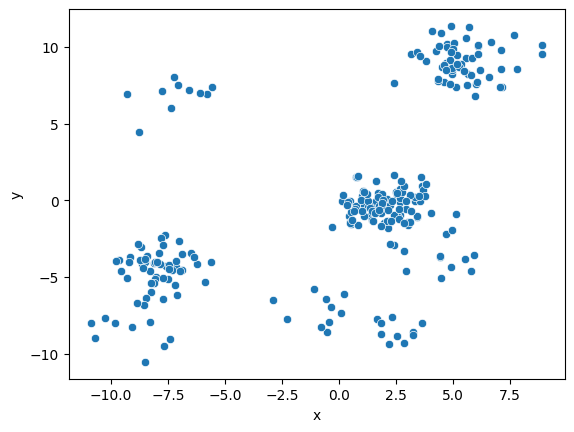

In [ ]:
sns.scatterplot(data=df_blobs, x="x", y="y")

<Axes: xlabel='x', ylabel='y'>

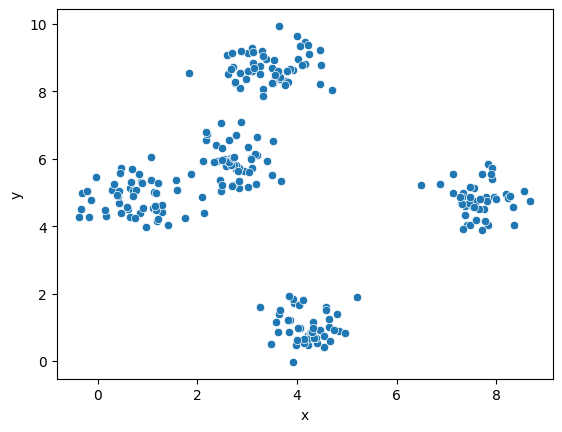

In [ ]:
sns.scatterplot(data=df_checker, x="x", y="y")

<Axes: xlabel='x', ylabel='y'>

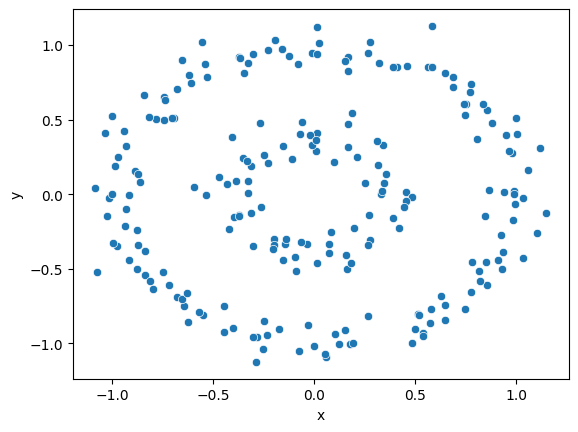

In [ ]:
sns.scatterplot(data=df_circles, x="x", y="y")

### 1.4. Подготовьте наборы данных проведя стандартизация или нормировку данных. Обоснуйте выбор операции.

In [ ]:
std_scaler = StandardScaler()
robust_scaler = RobustScaler()
min_max_scaler = MinMaxScaler()

df_blobs = robust_scaler.fit_transform(df_blobs)
df_checker = min_max_scaler.fit_transform(df_checker)
df_circles = std_scaler.fit_transform(df_circles)

## 2. K-Means:

---



### 2.1. Проведите исследование оптимального количества кластеров методов локтя. Сделайте выводы, о наиболее подходящем количестве кластеров.


#### df_blobs

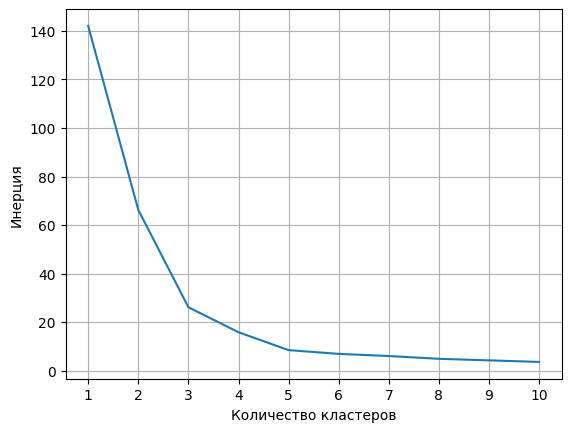

In [ ]:
# df_blobs
inertia_list = []
clusters_list = []
for i in range(10):
  temp_kmeans = KMeans(n_clusters=i+1, n_init=5)
  temp_kmeans.fit(df_blobs)
  inertia_list.append(temp_kmeans.inertia_)
  clusters_list.append(i+1)

plt.plot(clusters_list, inertia_list)
plt.ylabel('Инерция')
plt.xlabel('Количество кластеров')
plt.xticks(clusters_list)
plt.grid()
plt.show()

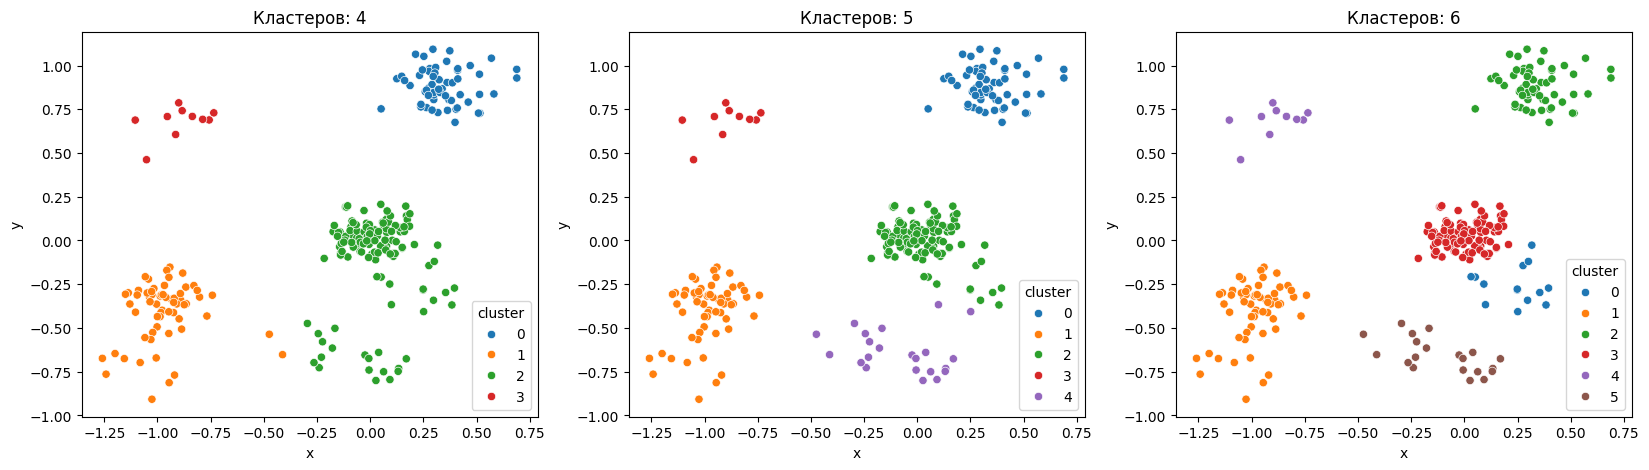

In [ ]:
# рассматриваем диапозон [4,6]
clusters_range = np.arange(4, 7, 1)

fig, axs = plt.subplots(1, len(clusters_range), figsize=(5*(len(clusters_range)+1), 5))
for i, cluster in enumerate(clusters_range):
  kmeans = KMeans(n_clusters=cluster, n_init=5)
  kmeans_df_blobs = kmeans.fit_predict(df_blobs)
  new_df_blobs = pd.DataFrame(data=df_blobs, columns=["x", "y"])
  new_df_blobs["cluster"] = kmeans_df_blobs
  sns.scatterplot(data=new_df_blobs, x="x", y="y", hue="cluster", ax=axs[i], palette="tab10").set(title=f"Кластеров: {cluster}")

#### df_checker

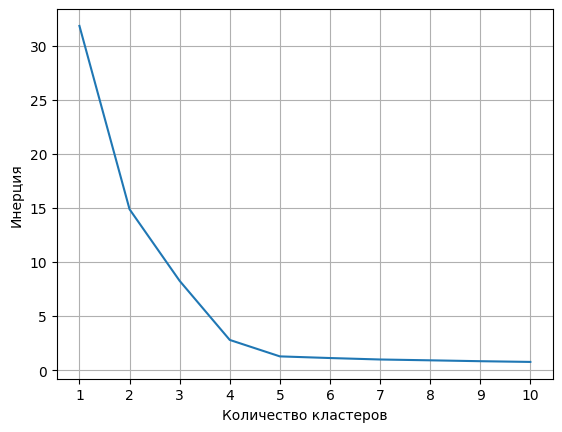

In [ ]:
# df_checker
inertia_list = []
clusters_list = []
for i in range(10):
  temp_kmeans = KMeans(n_clusters=i+1, n_init=5)
  temp_kmeans.fit(df_checker)
  inertia_list.append(temp_kmeans.inertia_)
  clusters_list.append(i+1)

plt.plot(clusters_list, inertia_list)
plt.ylabel('Инерция')
plt.xlabel('Количество кластеров')
plt.xticks(clusters_list)
plt.grid()
plt.show()

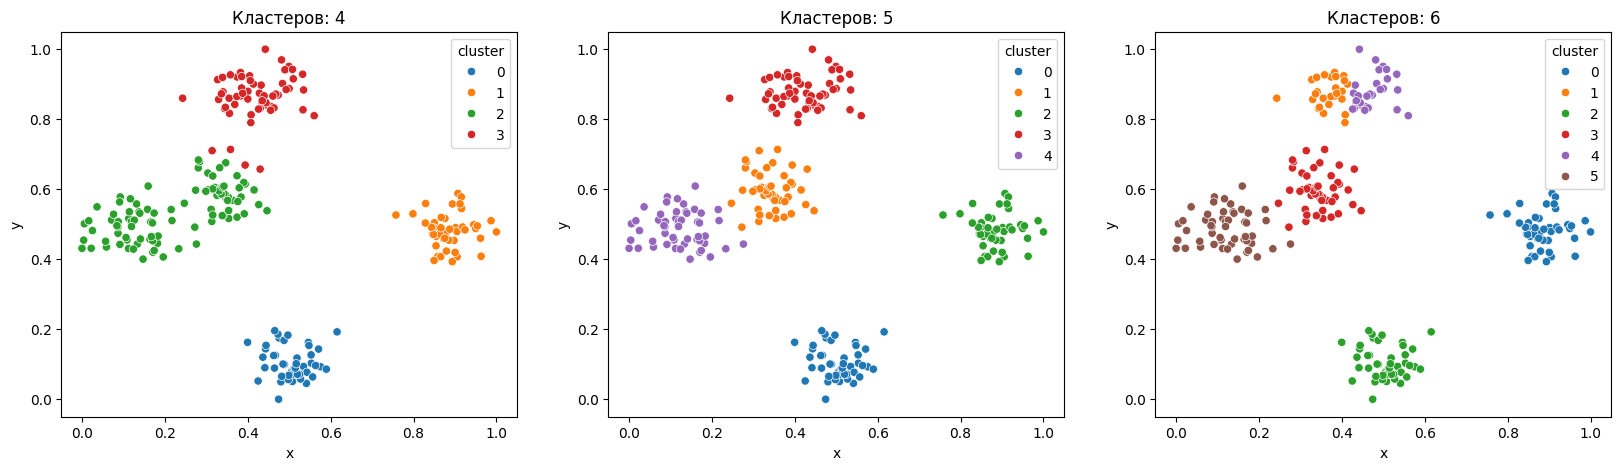

In [ ]:
# рассматриваем диапозон [4,6]
clusters_range = np.arange(4, 7, 1)

fig, axs = plt.subplots(1, len(clusters_range), figsize=(5*(len(clusters_range)+1), 5))
for i, cluster in enumerate(clusters_range):
  kmeans = KMeans(n_clusters=cluster, n_init=5)
  kmeans_df_checker = kmeans.fit_predict(df_checker)
  new_df_checker = pd.DataFrame(data=df_checker, columns=["x", "y"])
  new_df_checker["cluster"] = kmeans_df_checker
  sns.scatterplot(data=new_df_checker, x="x", y="y", hue="cluster", ax=axs[i], palette="tab10").set(title=f"Кластеров: {cluster}")

#### df_circles

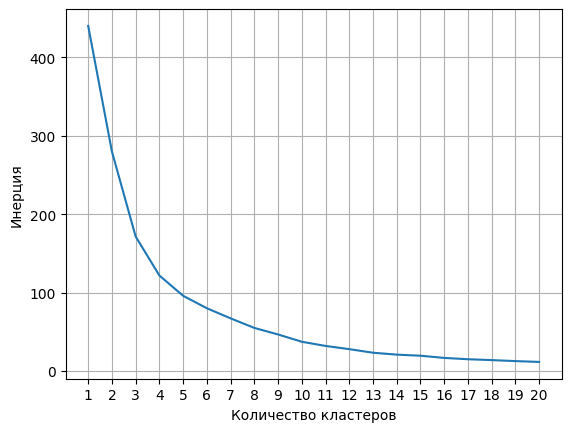

In [ ]:
# df_circles
inertia_list = []
clusters_list = []
for i in range(20):
  temp_kmeans = KMeans(n_clusters=i+1, n_init=5)
  temp_kmeans.fit(df_circles)
  inertia_list.append(temp_kmeans.inertia_)
  clusters_list.append(i+1)

plt.plot(clusters_list, inertia_list)
plt.ylabel('Инерция')
plt.xlabel('Количество кластеров')
plt.xticks(clusters_list)
plt.grid()
plt.show()

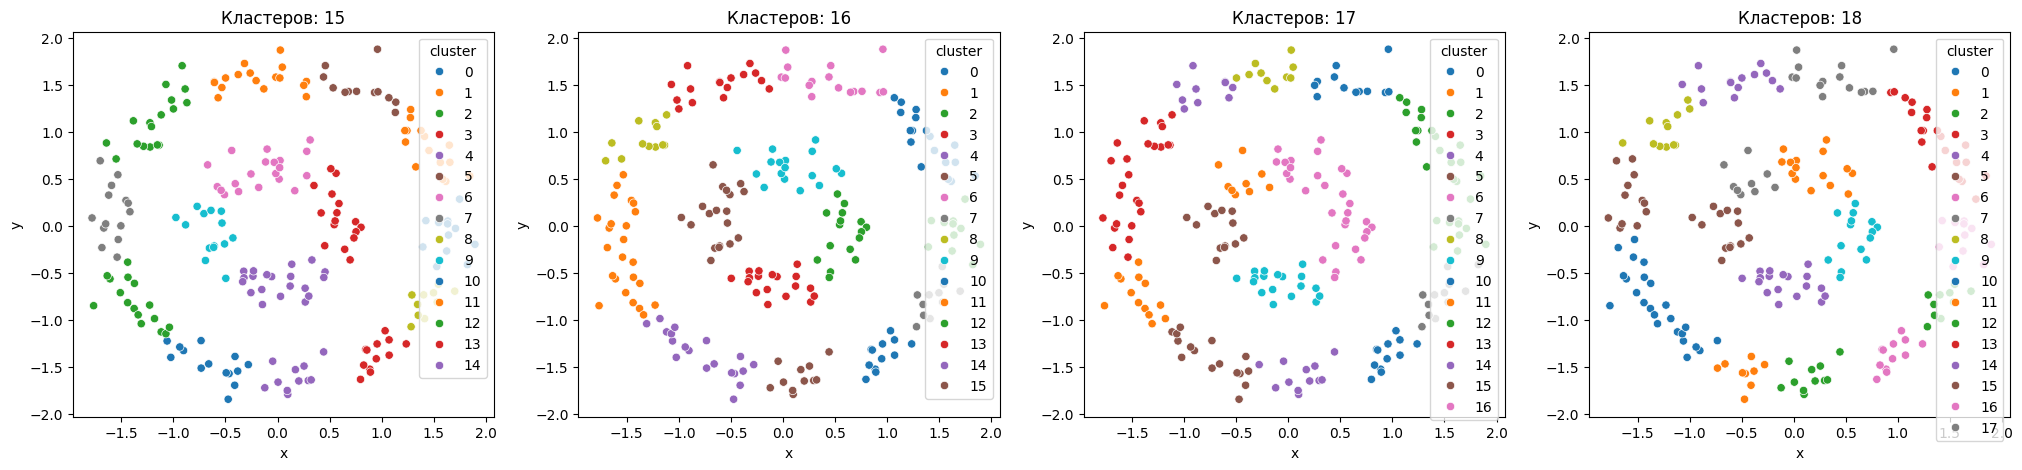

In [ ]:
# рассматриваем диапозон [15,18]
clusters_range = np.arange(15, 19, 1)

fig, axs = plt.subplots(1, len(clusters_range), figsize=(5*(len(clusters_range)+1), 5))
for i, cluster in enumerate(clusters_range):
  kmeans = KMeans(n_clusters=cluster, n_init=5)
  kmeans_df_circles = kmeans.fit_predict(df_circles)
  new_df_circles = pd.DataFrame(data=df_circles, columns=["x", "y"])
  new_df_circles["cluster"] = kmeans_df_circles
  sns.scatterplot(data=new_df_circles, x="x", y="y", hue="cluster", ax=axs[i], palette="tab10").set(title=f"Кластеров: {cluster}")

### 2.2. Проведите исследование оптимального количества кластеров методом силуэта. Сделайте выводы, о наиболее подходящем количестве кластеров.

#### df_blobs

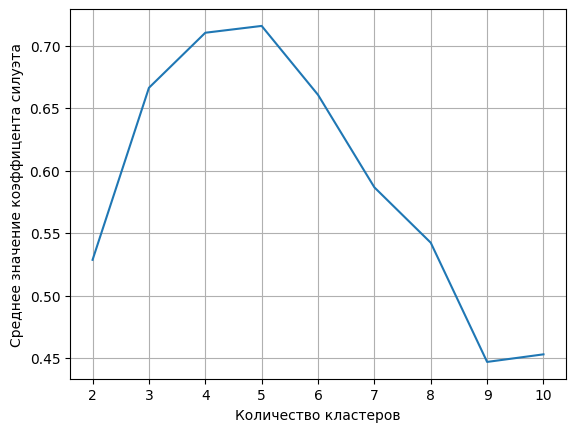

In [ ]:
silhouette_list = []
clusters_list = []
for i in range(1, 10):
  temp_kmeans = KMeans(n_clusters=i+1, n_init=5)
  temp_clusters = temp_kmeans.fit_predict(df_blobs)
  silhouette_list.append(silhouette_score(df_blobs, temp_clusters))
  clusters_list.append(i+1)

plt.plot(clusters_list, silhouette_list)
plt.ylabel('Среднее значение коэффицента силуэта')
plt.xlabel('Количество кластеров')
plt.xticks(clusters_list)
plt.grid()
plt.show()

[Text(0.5, 1.0, 'Кластеров: 5')]

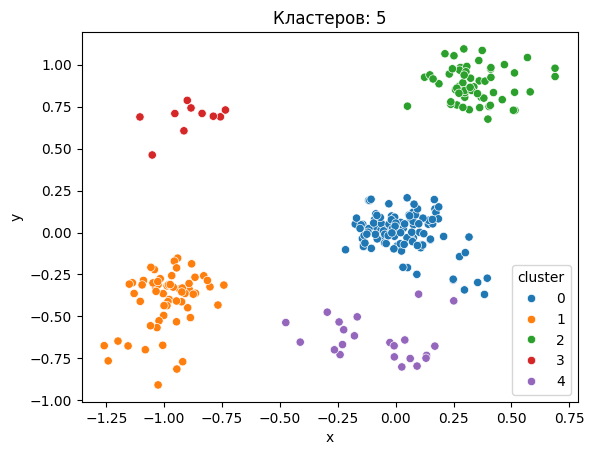

In [ ]:
# рассматриваем 5 кластеров

kmeans = KMeans(n_clusters=5, n_init=5)
kmeans_df_blobs = kmeans.fit_predict(df_blobs)
new_df_blobs = pd.DataFrame(data=df_blobs, columns=["x", "y"])
new_df_blobs["cluster"] = kmeans_df_blobs
sns.scatterplot(data=new_df_blobs, x="x", y="y", hue="cluster", palette="tab10").set(title="Кластеров: 5")

#### df_checker

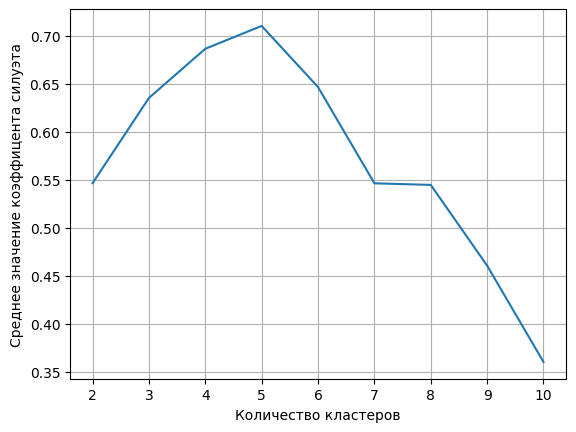

In [ ]:
# df_checker
silhouette_list = []
clusters_list = []
for i in range(1, 10):
  temp_kmeans = KMeans(n_clusters=i+1, n_init=5)
  temp_clusters = temp_kmeans.fit_predict(df_checker)
  silhouette_list.append(silhouette_score(df_checker, temp_clusters))
  clusters_list.append(i+1)

plt.plot(clusters_list, silhouette_list)
plt.ylabel('Среднее значение коэффицента силуэта')
plt.xlabel('Количество кластеров')
plt.xticks(clusters_list)
plt.grid()
plt.show()

[Text(0.5, 1.0, 'Кластеров: 5')]

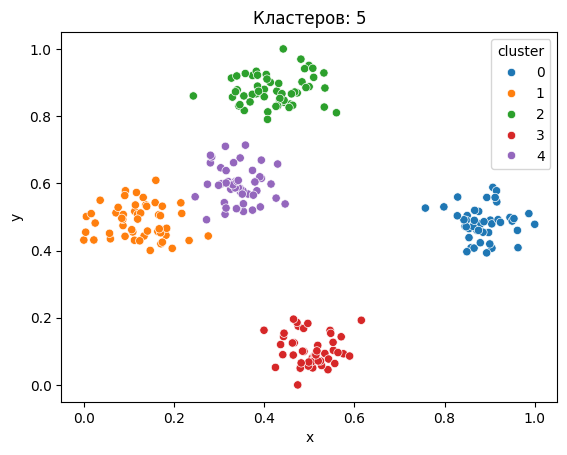

In [ ]:
# рассматриваем 5 кластеров

kmeans = KMeans(n_clusters=5, n_init=5)
kmeans_df_checker = kmeans.fit_predict(df_checker)
new_df_checker = pd.DataFrame(data=df_checker, columns=["x", "y"])
new_df_checker["cluster"] = kmeans_df_checker
sns.scatterplot(data=new_df_checker, x="x", y="y", hue="cluster", palette="tab10").set(title="Кластеров: 5")

#### df_circles

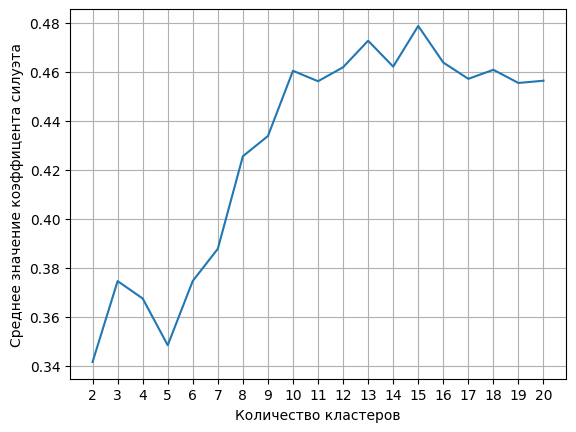

In [ ]:
# df_circles
silhouette_list = []
clusters_list = []
for i in range(1, 20):
  temp_kmeans = KMeans(n_clusters=i+1, n_init=5)
  temp_clusters = temp_kmeans.fit_predict(df_circles)
  silhouette_list.append(silhouette_score(df_circles, temp_clusters))
  clusters_list.append(i+1)

plt.plot(clusters_list, silhouette_list)
plt.ylabel('Среднее значение коэффицента силуэта')
plt.xlabel('Количество кластеров')
plt.xticks(clusters_list)
plt.grid()
plt.show()

[Text(0.5, 1.0, 'Кластеров: 13')]

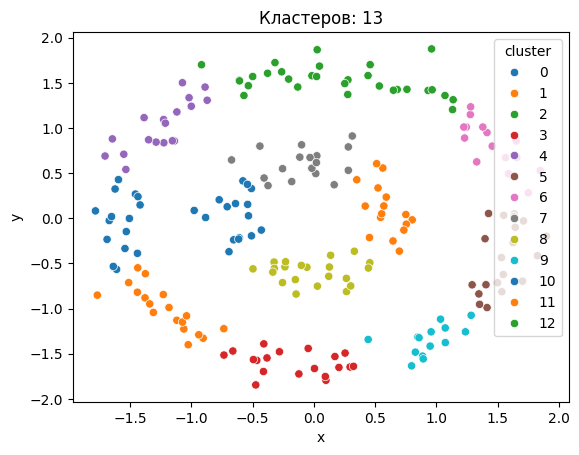

In [ ]:
# рассматриваем 13 кластеров

kmeans = KMeans(n_clusters=13, n_init=5)
kmeans_df_circles = kmeans.fit_predict(df_circles)
new_df_circles = pd.DataFrame(data=df_circles, columns=["x", "y"])
new_df_circles["cluster"] = kmeans_df_circles
sns.scatterplot(data=new_df_circles, x="x", y="y", hue="cluster", palette="tab10").set(title="Кластеров: 13")

### 2.3. Проведите кластеризацию алгоритмом K-means, с выбранным оптимальным количеством кластеров.

#### df_blobs

In [ ]:
# рассматриваем 5 кластеров

clusters_df_blobs = 5
kmeans_df_blobs = KMeans(n_clusters=clusters_df_blobs, n_init=5)
clusters_list = kmeans_df_blobs.fit_predict(df_blobs)
print(f"Инерция: {kmeans_df_blobs.inertia_}")
new_df_blobs = pd.DataFrame(data=df_blobs, columns=["x", "y"])
new_df_blobs["cluster"] = clusters_list
new_df_blobs.head()

Инерция: 8.463214457439799


,x,y,cluster
0,-0.978166,-0.398948,1
1,-0.881326,-0.186405,1
2,0.688925,0.928794,2
3,-0.081534,0.028813,0
4,-0.142009,0.048417,0


#### df_checker

In [ ]:
# рассматриваем 5 кластеров

clusters_df_checker = 5
kmeans_df_checker = KMeans(n_clusters=clusters_df_checker, n_init=5)
clusters_list = kmeans_df_checker.fit_predict(df_checker)
print(f"Инерция: {kmeans_df_checker.inertia_}")
new_df_checker = pd.DataFrame(data=df_checker, columns=["x", "y"])
new_df_checker["cluster"] = clusters_list
new_df_checker.head()

Инерция: 1.2715651492842117


,x,y,cluster
0,0.488188,0.099736,2
1,0.875721,0.516494,0
2,0.358406,0.713658,1
3,0.464496,0.088867,2
4,0.506409,0.080116,2


#### df_circles

In [ ]:
# рассматриваем 13 кластеров

clusters_df_circles = 13
kmeans_df_circles = KMeans(n_clusters=clusters_df_circles, n_init=5)
clusters_list = kmeans_df_circles.fit_predict(df_circles)
print(f"Инерция: {kmeans_df_circles.inertia_}")
new_df_circles = pd.DataFrame(data=df_circles, columns=["x", "y"])
new_df_circles["cluster"] = clusters_list
new_df_circles.head()

Инерция: 23.798063671173722


,x,y,cluster
0,0.562846,0.556894,1
1,1.131939,1.203655,12
2,0.015863,0.495274,1
3,-1.374778,-0.613389,9
4,0.204790,-1.651016,0


### 2.4. Постройте диаграмму рассеяния результатов кластеризации с выделением разным цветом разных кластеров.

#### df_blobs

[Text(0.5, 1.0, 'Кластеров: 5')]

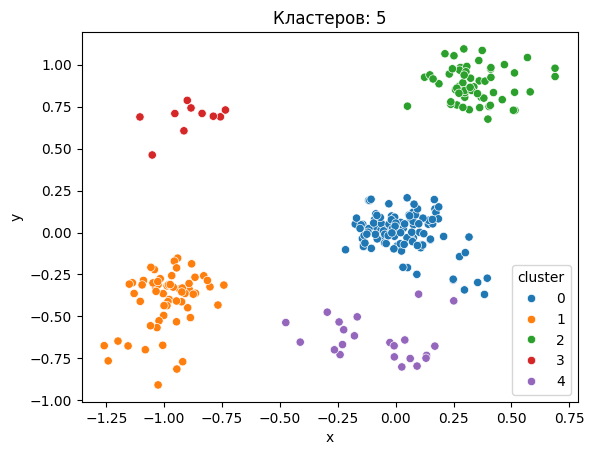

In [ ]:
sns.scatterplot(data=new_df_blobs, x="x", y="y", hue="cluster", palette="tab10").set(title=f"Кластеров: {clusters_df_blobs}")

#### df_checker

[Text(0.5, 1.0, 'Кластеров: 5')]

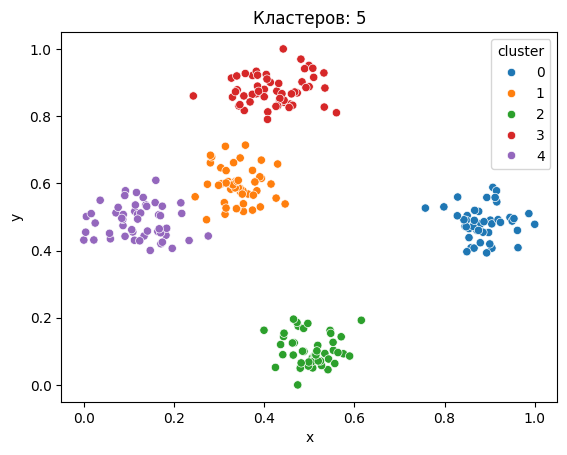

In [ ]:
sns.scatterplot(data=new_df_checker, x="x", y="y", hue="cluster", palette="tab10").set(title=f"Кластеров: {clusters_df_checker}")

#### df_circles

[Text(0.5, 1.0, 'Кластеров: 13')]

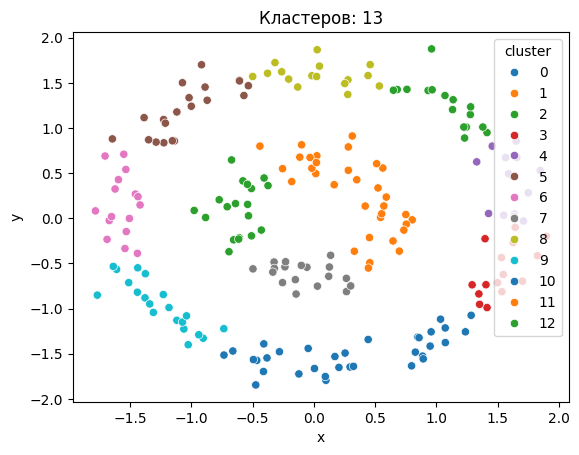

In [ ]:
sns.scatterplot(data=new_df_circles, x="x", y="y", hue="cluster", palette="tab10").set(title=f"Кластеров: {clusters_df_circles}")

### 2.5. Постройте диаграмму Вороного для результатов кластеризации. На диаграмме отметьте центроиды полученных кластеров.

#### df_blobs

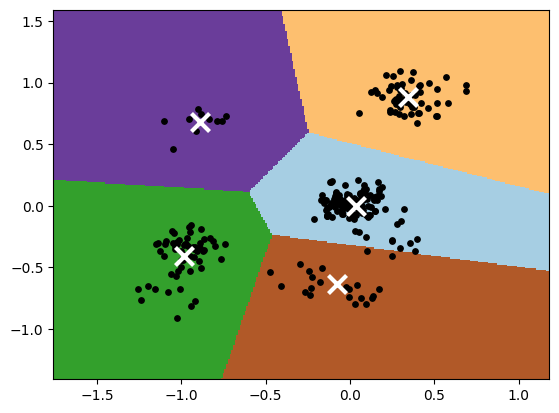

In [ ]:
h = 0.01

x_min, x_max = df_blobs[:, 0].min() - 0.5, df_blobs[:, 0].max() + 0.5
y_min, y_max = df_blobs[:, 1].min() - 0.5, df_blobs[:, 1].max() + 0.5
X, Y = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

centroids = kmeans_df_blobs.cluster_centers_
clusters_list_im = kmeans_df_blobs.predict(np.c_[X.ravel(), Y.ravel()])
clusters_list_im = clusters_list_im.reshape(X.shape)

plt.imshow(
    clusters_list_im,
    interpolation="nearest",
    extent=(X.min(), X.max(), Y.min(), Y.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower"
)
plt.scatter(
    df_blobs[:, 0],
    df_blobs[:, 1],
    s=15,
    color="black"
)
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="white"
)

#### df_checker

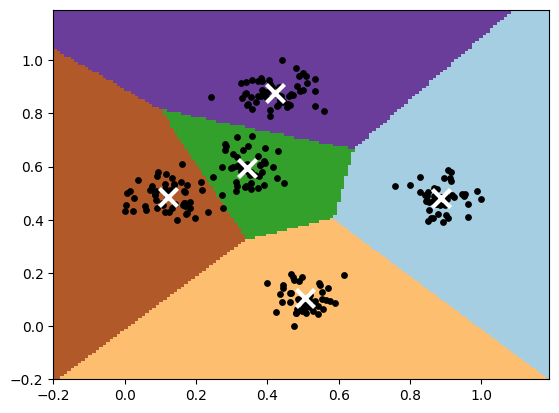

In [ ]:
h = 0.01

x_min, x_max = df_checker[:, 0].min() - 0.2, df_checker[:, 0].max() + 0.2
y_min, y_max = df_checker[:, 1].min() - 0.2, df_checker[:, 1].max() + 0.2
X, Y = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

centroids = kmeans_df_checker.cluster_centers_
clusters_list_im = kmeans_df_checker.predict(np.c_[X.ravel(), Y.ravel()])
clusters_list_im = clusters_list_im.reshape(X.shape)

plt.imshow(
    clusters_list_im,
    interpolation="nearest",
    extent=(X.min(), X.max(), Y.min(), Y.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower"
)
plt.scatter(
    df_checker[:, 0],
    df_checker[:, 1],
    s=15,
    color="black"
)
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="white"
)

#### df_circles

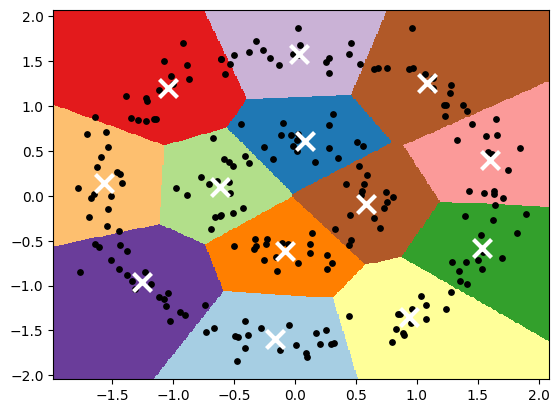

In [ ]:
h = 0.01

x_min, x_max = df_circles[:, 0].min() - 0.2, df_circles[:, 0].max() + 0.2
y_min, y_max = df_circles[:, 1].min() - 0.2, df_circles[:, 1].max() + 0.2
X, Y = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

centroids = kmeans_df_circles.cluster_centers_
clusters_list_im = kmeans_df_circles.predict(np.c_[X.ravel(), Y.ravel()])
clusters_list_im = clusters_list_im.reshape(X.shape)

plt.imshow(
    clusters_list_im,
    interpolation="nearest",
    extent=(X.min(), X.max(), Y.min(), Y.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower"
)
plt.scatter(
    df_circles[:, 0],
    df_circles[:, 1],
    s=15,
    color="black"
)
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="white"
)

### 2.6. Постройте для каждого признака диаграмму “box-plot” или “violin-plot”, с разделением по кластерам. Сделайте выводы о разделении кластеров и успешности применения кластеризации K-means к набору данных.

#### df_blobs

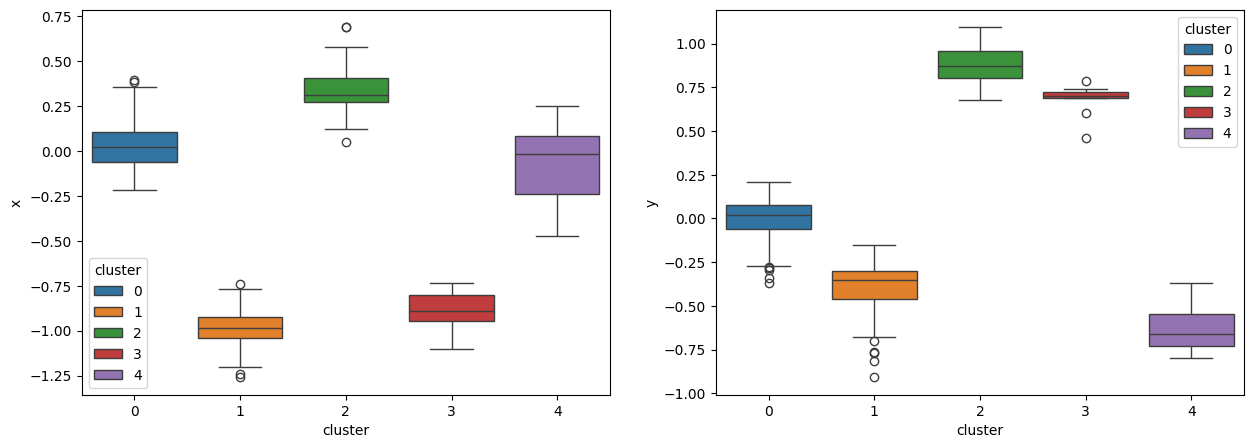

In [ ]:
fig, axs = plt.subplots(1, len(new_df_blobs.columns[:-1]), figsize=(5 * (len(new_df_blobs.columns)), 5))
for i, column in enumerate(new_df_blobs.columns[:-1]):
  sns.boxplot(data=new_df_blobs, x="cluster", y=column, ax=axs[i], hue="cluster", palette="tab10")

#### df_checker

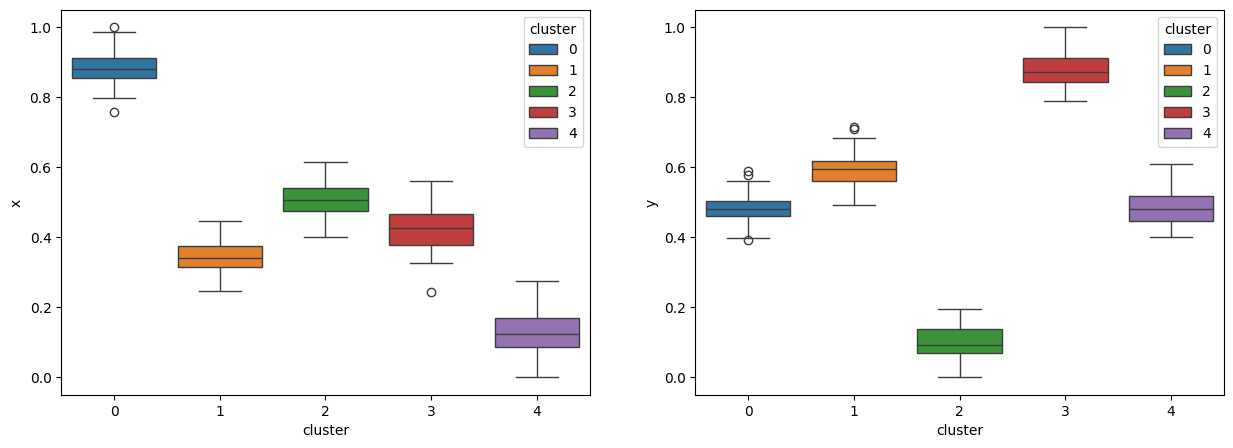

In [ ]:
fig, axs = plt.subplots(1, len(new_df_checker.columns[:-1]), figsize=(5 * (len(new_df_checker.columns)), 5))
for i, column in enumerate(new_df_checker.columns[:-1]):
  sns.boxplot(data=new_df_checker, x="cluster", y=column, ax=axs[i], hue="cluster", palette="tab10")

#### df_circles

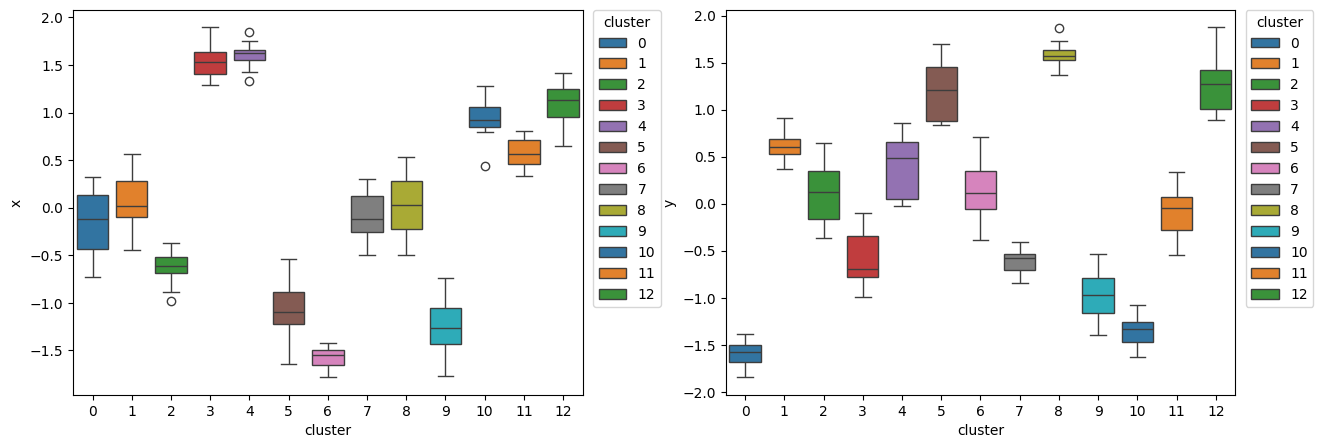

In [ ]:
fig, axs = plt.subplots(1, len(new_df_circles.columns[:-1]), figsize=(5 * (len(new_df_circles.columns)), 5))
plt.subplots_adjust(wspace=0.28)
for i, column in enumerate(new_df_circles.columns[:-1]):
  sns.boxplot(data=new_df_circles, x="cluster", y=column, ax=axs[i], hue="cluster", palette="tab10")
  axs[i].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title="cluster")

### 2.7. Рассчитайте для каждого кластера кол-во точек, среднее, СКО, минимум и максимум. Сопоставьте результаты с построенными графиками.

#### df_blobs

In [ ]:
stats = new_df_blobs.groupby('cluster').agg(['count', 'mean', 'std', 'min', 'max'])
stats

x                                             y            \
        count      mean       std       min       max count      mean   
cluster                                                                 
0         108  0.033117  0.130049 -0.216461  0.395828   108  0.001065   
1          60 -0.985492  0.107505 -1.259026 -0.742091    60 -0.404092   
2          60  0.341517  0.123038  0.051061  0.688925    60  0.881711   
3          10 -0.892482  0.121068 -1.104643 -0.735323    10  0.681247   
4          22 -0.079961  0.200390 -0.474481  0.251056    22 -0.635102   

                                       
              std       min       max  
cluster                                
0        0.116065 -0.368633  0.206640  
1        0.168927 -0.907573 -0.152502  
2        0.100603  0.675308  1.093235  
3        0.089950  0.461660  0.786807  
4        0.121166 -0.800494 -0.367181

#### df_checker

In [ ]:
stats = new_df_checker.groupby('cluster').agg(['count', 'mean', 'std', 'min', 'max'])
stats

x                                             y            \
        count      mean       std       min       max count      mean   
cluster                                                                 
0          46  0.886668  0.046826  0.757464  1.000000    46  0.481167   
1          50  0.343477  0.042936  0.246900  0.446452    50  0.594685   
2          46  0.504848  0.045788  0.399567  0.615417    46  0.103930   
3          55  0.421779  0.064685  0.242856  0.560222    55  0.877348   
4          53  0.122688  0.061366  0.000000  0.275951    53  0.485998   

                                       
              std       min       max  
cluster                                
0        0.047662  0.392983  0.588039  
1        0.053326  0.491675  0.713658  
2        0.046222  0.000000  0.195799  
3        0.043846  0.790301  1.000000  
4        0.049018  0.400259  0.608984

#### df_circles

In [ ]:
stats = new_df_circles.groupby('cluster').agg(['count', 'mean', 'std', 'min', 'max'])
stats

x                                             y            \
        count      mean       std       min       max count      mean   
cluster                                                                 
0          19 -0.159422  0.341649 -0.733413  0.323427    19 -1.600456   
1          17  0.081864  0.272642 -0.440039  0.562846    17  0.616094   
2          19 -0.612527  0.153614 -0.976297 -0.373873    19  0.103687   
3          15  1.533874  0.177999  1.291496  1.897220    15 -0.582497   
4          14  1.601029  0.133848  1.329117  1.847389    14  0.394926   
5          20 -1.040986  0.297964 -1.643896 -0.534420    20  1.200054   
6          16 -1.569903  0.108289 -1.782003 -1.417843    16  0.145100   
7          18 -0.078152  0.239110 -0.496635  0.300822    18 -0.615115   
8          16  0.033188  0.317976 -0.498945  0.534465    16  1.585156   
9          20 -1.255077  0.271003 -1.766823 -0.734568    20 -0.958362   
10         14  0.940053  0.205687  0.443384  1.283576    14 -1.349135   
11         16  0.579676  0.139977  0.330522  0.802594    16 -0.093812   
12         16  1.083294  0.238272  0.649307  1.412938    16  1.257283   

                                       
              std       min       max  
cluster                                
0        0.125968 -1.844962 -1.390329  
1        0.153366  0.371703  0.911415  
2        0.281941 -0.369883  0.646433  
3        0.287103 -0.988395 -0.099780  
4        0.318415 -0.029239  0.856072  
5        0.280267  0.836248  1.700414  
6        0.338777 -0.387890  0.709539  
7        0.121756 -0.838558 -0.409697  
8        0.119731  1.371004  1.866606  
9        0.271858 -1.399911 -0.532606  
10       0.162788 -1.633670 -1.074135  
11       0.259392 -0.550613  0.336351  
12       0.253030  0.889113  1.875692

## 3. DBSCAN:

---



### 3.1 - 3.2. Подберите параметры алгоритма DBSCAN, которые на ваш взгляд дают наилучшие результаты. Опишите процесс (почему и как изменяли параметры) подбора параметров.

#### df_blobs

{0, 1, 2, 3, 4}


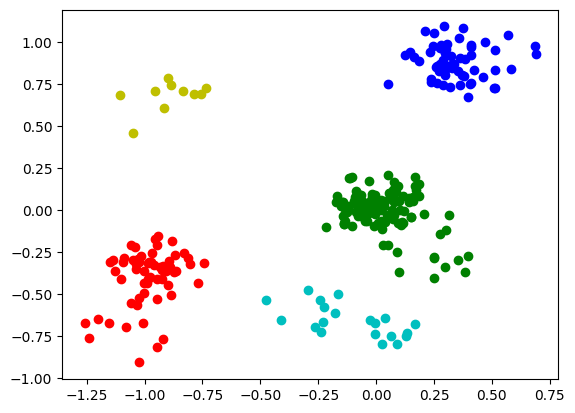

In [ ]:
dbscan = DBSCAN(eps = 0.2, min_samples = 3)
dbscan_clust = dbscan.fit_predict(df_blobs)
print(set(dbscan_clust))
plt.scatter(df_blobs[dbscan_clust == 0,0], df_blobs[dbscan_clust == 0,1], c = 'r')
plt.scatter(df_blobs[dbscan_clust == 1,0], df_blobs[dbscan_clust == 1,1], c = 'b')
plt.scatter(df_blobs[dbscan_clust == 2,0], df_blobs[dbscan_clust == 2,1], c = 'g')
plt.scatter(df_blobs[dbscan_clust == 3,0], df_blobs[dbscan_clust == 3,1], c = 'y')
plt.scatter(df_blobs[dbscan_clust == 4,0], df_blobs[dbscan_clust == 4,1], c = 'c')
plt.scatter(df_blobs[dbscan_clust == 5,0], df_blobs[dbscan_clust == 5,1], c = 'purple')
plt.scatter(df_blobs[dbscan_clust == 6,0], df_blobs[dbscan_clust == 6,1], c = 'pink')
plt.scatter(df_blobs[dbscan_clust == 7,0], df_blobs[dbscan_clust == 7,1], c = 'brown')
plt.scatter(df_blobs[dbscan_clust == 8,0], df_blobs[dbscan_clust == 8,1], c = 'orange')
plt.scatter(df_blobs[dbscan_clust == 9,0], df_blobs[dbscan_clust == 9,1], c = 'm')
plt.scatter(df_blobs[dbscan_clust == 10,0], df_blobs[dbscan_clust == 10,1], c = 'crimson')
plt.scatter(df_blobs[dbscan_clust == 11,0], df_blobs[dbscan_clust == 11,1], c = 'gray')
plt.scatter(df_blobs[dbscan_clust == -1,0], df_blobs[dbscan_clust == -1,1], c ='k', marker = 'x')
plt.show()

#### df_checker

{0, 1, 2, 3, 4, -1}


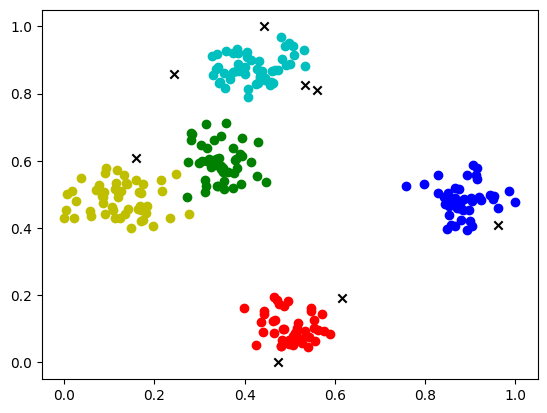

In [122]:
dbscan = DBSCAN(eps = 0.046, min_samples = 3)
dbscan_clust = dbscan.fit_predict(df_checker)
print(set(dbscan_clust))
plt.scatter(df_checker[dbscan_clust == 0,0], df_checker[dbscan_clust == 0,1], c = 'r')
plt.scatter(df_checker[dbscan_clust == 1,0], df_checker[dbscan_clust == 1,1], c = 'b')
plt.scatter(df_checker[dbscan_clust == 2,0], df_checker[dbscan_clust == 2,1], c = 'g')
plt.scatter(df_checker[dbscan_clust == 3,0], df_checker[dbscan_clust == 3,1], c = 'y')
plt.scatter(df_checker[dbscan_clust == 4,0], df_checker[dbscan_clust == 4,1], c = 'c')
plt.scatter(df_checker[dbscan_clust == 5,0], df_checker[dbscan_clust == 5,1], c = 'gray')
plt.scatter(df_checker[dbscan_clust == -1,0], df_checker[dbscan_clust == -1,1], c ='k', marker = 'x')
plt.show()

#### df_circles

{0, 1, -1}


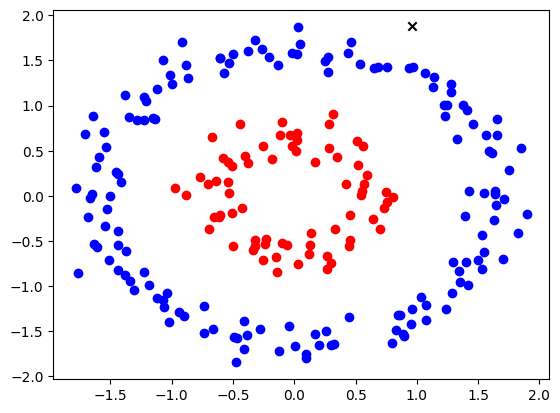

In [ ]:
dbscan = DBSCAN(eps = 0.4, min_samples = 3)
dbscan_clust = dbscan.fit_predict(df_circles)
print(set(dbscan_clust))
plt.scatter(df_circles[dbscan_clust == 0,0], df_circles[dbscan_clust == 0,1], c = 'r')
plt.scatter(df_circles[dbscan_clust == 1,0], df_circles[dbscan_clust == 1,1], c = 'b')
plt.scatter(df_circles[dbscan_clust == 2,0], df_circles[dbscan_clust == 2,1], c = 'g')
plt.scatter(df_circles[dbscan_clust == 3,0], df_circles[dbscan_clust == 3,1], c = 'y')
plt.scatter(df_circles[dbscan_clust == 4,0], df_circles[dbscan_clust == 4,1], c = 'c')
plt.scatter(df_circles[dbscan_clust == 5,0], df_circles[dbscan_clust == 5,1], c = 'purple')
plt.scatter(df_circles[dbscan_clust == 6,0], df_circles[dbscan_clust == 6,1], c = 'pink')
plt.scatter(df_circles[dbscan_clust == 7,0], df_circles[dbscan_clust == 7,1], c = 'brown')
plt.scatter(df_circles[dbscan_clust == 8,0], df_circles[dbscan_clust == 8,1], c = 'orange')
plt.scatter(df_circles[dbscan_clust == 9,0], df_circles[dbscan_clust == 9,1], c = 'm')
plt.scatter(df_circles[dbscan_clust == 10,0], df_circles[dbscan_clust == 10,1], c = 'crimson')
plt.scatter(df_circles[dbscan_clust == 11,0], df_circles[dbscan_clust == 11,1], c = 'gray')
plt.scatter(df_circles[dbscan_clust == -1,0], df_circles[dbscan_clust == -1,1], c ='k', marker = 'x')
plt.show()

### 3.2. Постройте диаграмму рассеяния результатов кластеризации с выделением разным цветом разных кластеров.

#### df_blobs

#### df_checker

#### df_circles

### 3.3. Сделайте выводы об успешности кластеризации.

## 4. Иерархическая кластеризация:

---



### 4.1. Проведите иерархическую кластеризацию при всех возможных параметрах linkage, используя количество кластеров полученных в п.2 или п.3. Для каждого из результатов постройте дендрограмму. Сделайте выводы, о разделении кластеров и необходимости изменить количество кластеров (если считаете, что необходимо изменить количество кластеров, то повторите кластеризацию с другим количеством кластеров).

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

#### df_blobs

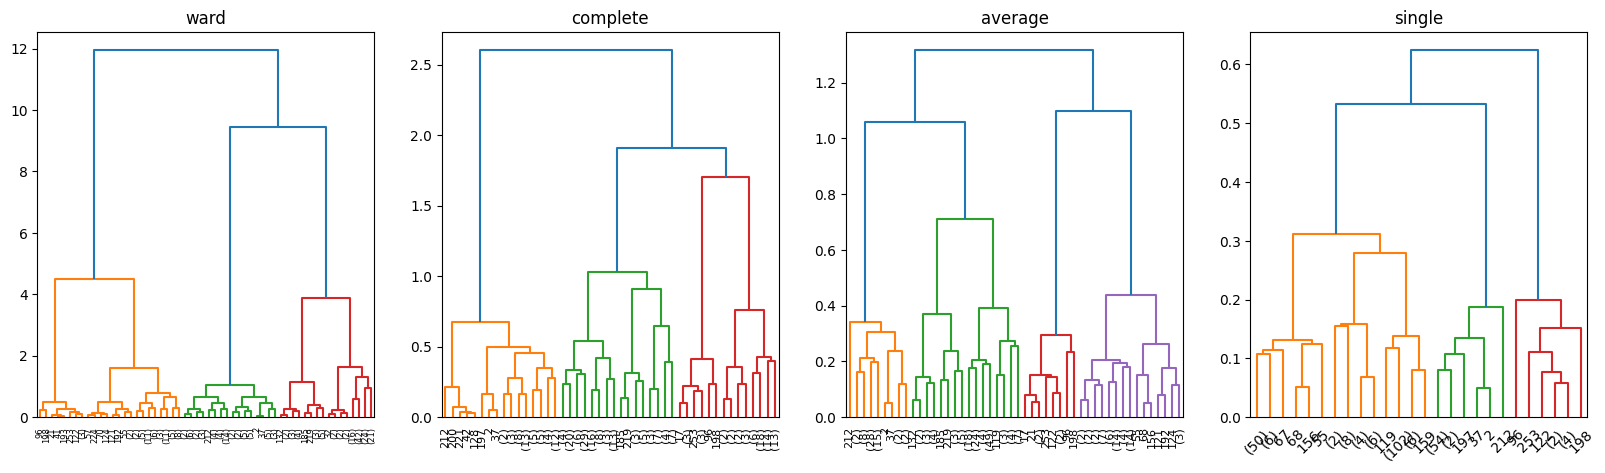

In [130]:
fig, axis = plt.subplots(1, 4, figsize = (20, 5))
linkages = ["ward", "complete", "average", "single"]
for i in range(4):
  agc = AgglomerativeClustering(distance_threshold=0, n_clusters = None, linkage=linkages[i])
  agc = agc.fit(df_blobs)
  plot_dendrogram(agc, truncate_mode="level", p=5, ax = axis[i])
  axis[i].set_title(linkages[i])




#### df_checker

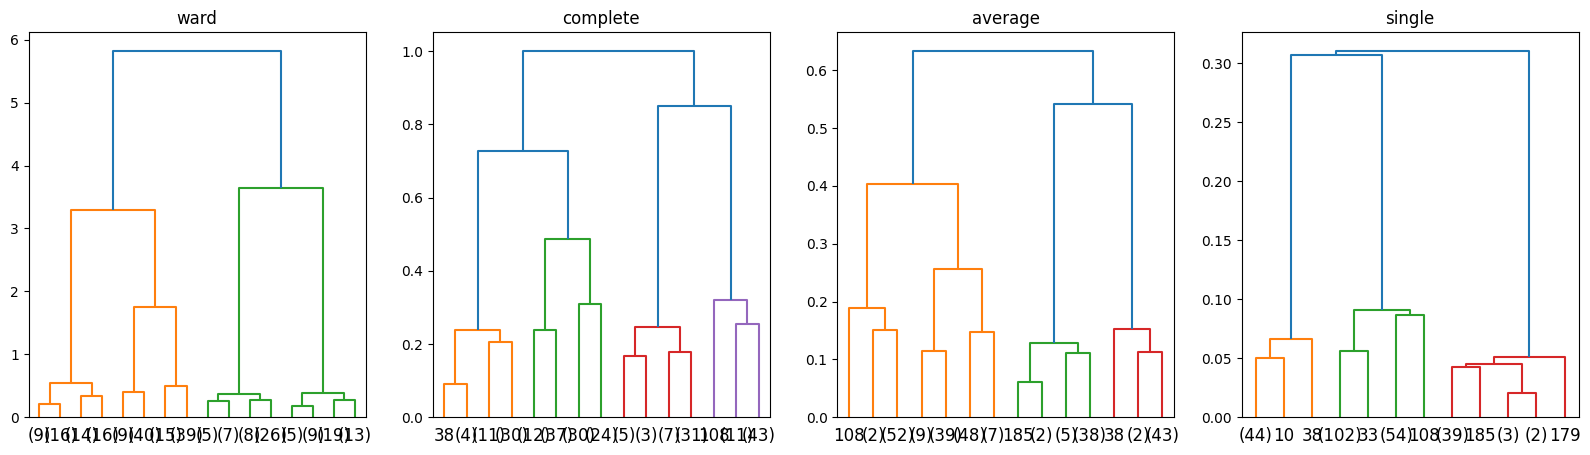

In [ ]:
fig, axis = plt.subplots(1, 4, figsize = (20, 5))
linkages = ["ward", "complete", "average", "single"]
for i in range(4):
  agc = AgglomerativeClustering(distance_threshold=0, n_clusters = None, linkage=linkages[i])
  agc = agc.fit(df_checker)
  plot_dendrogram(agc, truncate_mode="level", p=3, ax = axis[i])
  axis[i].set_title(linkages[i])

#### df_circles

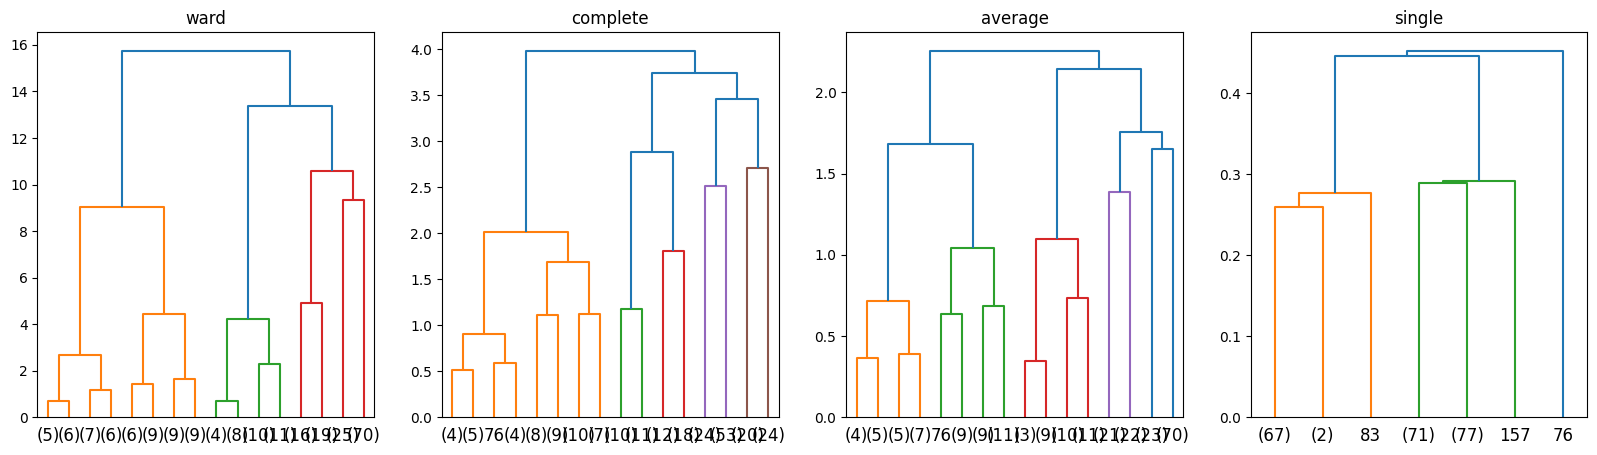

In [ ]:
fig, axis = plt.subplots(1, 4, figsize = (20, 5))
linkages = ["ward", "complete", "average", "single"]
for i in range(4):
  agc = AgglomerativeClustering(distance_threshold=0, n_clusters = None, linkage=linkages[i])
  agc = agc.fit(df_circles)
  plot_dendrogram(agc, truncate_mode="level", p=3, ax = axis[i])
  axis[i].set_title(linkages[i])

### 4.2. Постройте диаграмму рассеяния результатов кластеризации с выделением разным цветом разных кластеров. Используйте лучшие результаты, полученные для определенного параметра linkage.

#### df_blobs


<Axes: xlabel='x', ylabel='y'>

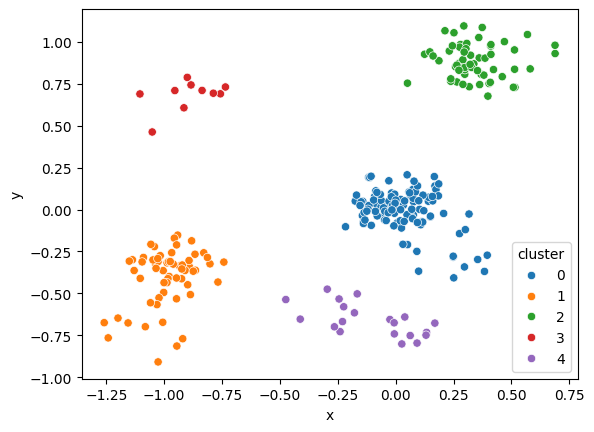

In [132]:
agc = AgglomerativeClustering(n_clusters=None,
distance_threshold=2, linkage="ward")
ag_blobs_clust = agc.fit_predict(df_blobs)
new_df_blobs = pd.DataFrame(data=df_blobs, columns=["x",
"y"])
new_df_blobs["cluster"] = ag_blobs_clust
sns.scatterplot(data=new_df_blobs, x="x", y="y",
hue="cluster", palette="tab10")

#### df_checker

<Axes: xlabel='x', ylabel='y'>

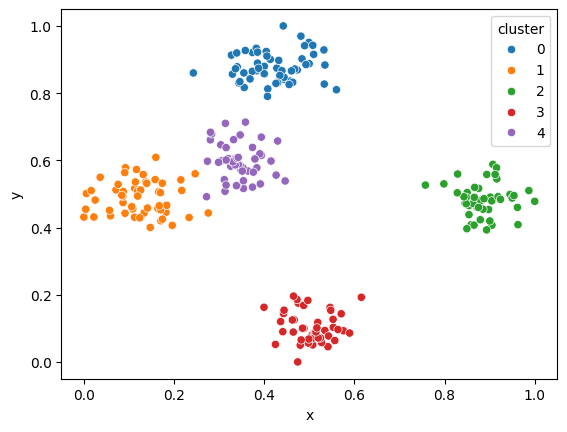

In [133]:

agc = AgglomerativeClustering(n_clusters=None,
distance_threshold=1, linkage="ward")
ag_checker_clust = agc.fit_predict(df_checker)
new_df_checker = pd.DataFrame(data=df_checker, columns=["x",
"y"])
new_df_checker["cluster"] = ag_checker_clust
sns.scatterplot(data=new_df_checker, x="x", y="y",
hue="cluster", palette="tab10")

#### df_circles

<Axes: xlabel='x', ylabel='y'>

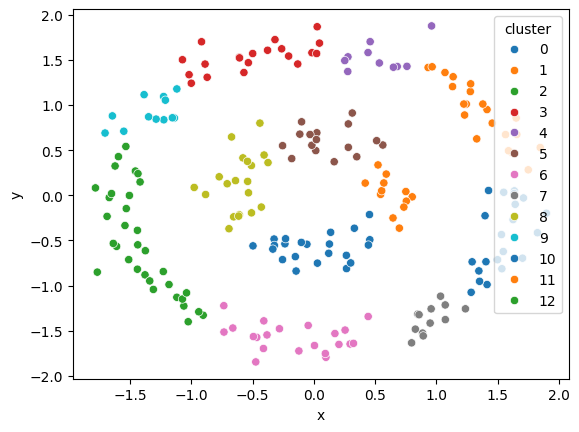

In [137]:
agc = AgglomerativeClustering(n_clusters=None,
distance_threshold=0.8, linkage="average")
ag_circles_clust = agc.fit_predict(df_circles)
new_df_circles = pd.DataFrame(data=df_circles, columns=["x","y"])
new_df_circles["cluster"] = ag_circles_clust
sns.scatterplot(data=new_df_circles, x="x", y="y",
hue="cluster", palette="tab10")

### 4.3. Сравните результаты кластеризации с результатами полученными в п.2 и п.3. Сделайте выводы о том, какой метод кластеризации подходит под каждый из наборов данных.